In [51]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

# Data Acquisition

In [52]:
xls = pd.ExcelFile('Spreadsheets_Exercises.xlsx')
xls

In [53]:
xls.sheet_names

['Table1_CustDetails',
 'Table2_ContractType',
 'Table3_PhoneService',
 'Table4_InternetService',
 'Table5_Dates',
 'Table6_Holidays',
 'Table7_Users',
 'Table8_Sparklines']

# Preparation 
## 1. Handling null values: the Nan values in total_charges are filled with the montly_charges in the same row, assuming the customer just started the service for the 1st month

In [54]:
# Null values have been found in column 'total_charges'

CustDetails = xls.parse('Table1_CustDetails')
CustDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7038 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


In [55]:
is_nan = CustDetails.isnull()
is_nan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   customer_id        7049 non-null   bool 
 1   gender             7049 non-null   bool 
 2   is_senior_citizen  7049 non-null   bool 
 3   partner            7049 non-null   bool 
 4   dependents         7049 non-null   bool 
 5   phone_service      7049 non-null   bool 
 6   internet_service   7049 non-null   bool 
 7   contract_type      7049 non-null   bool 
 8   payment_type       7049 non-null   bool 
 9   monthly_charges    7049 non-null   bool 
 10  total_charges      7049 non-null   bool 
 11  churn              7049 non-null   bool 
dtypes: bool(12)
memory usage: 82.7 KB


In [56]:
row_has_nan = is_nan.any(axis=1)
row_has_nan.describe()

count      7049
unique        2
top       False
freq       7038
dtype: object

In [57]:
row_with_nan = CustDetails[row_has_nan].sort_values(by = 'monthly_charges')
row_with_nan

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
2025,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,NaN,No
5433,7644-OMVMY,Male,0,Yes,Yes,1,0,2,Mailed check,19.85,NaN,No
1731,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,NaN,No
2176,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,NaN,No
2250,3213-VVOLG,Male,0,Yes,Yes,2,0,2,Mailed check,25.35,NaN,No
3052,4367-NUYAO,Male,0,Yes,Yes,2,0,2,Mailed check,25.75,NaN,No
3118,4472-LVYGI,Female,0,Yes,Yes,0,1,2,Bank transfer (automatic),52.55,NaN,No
945,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,NaN,No
1906,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,NaN,No
2855,4075-WKNIU,Female,0,Yes,Yes,2,1,2,Mailed check,73.35,NaN,No


In [58]:
filled_values = CustDetails.monthly_charges.iloc[row_with_nan.index]
filled_values

2025    19.70
5433    19.85
1731    20.00
2176    20.25
2250    25.35
3052    25.75
3118    52.55
945     56.05
1906    61.90
2855    73.35
4054    80.85
Name: monthly_charges, dtype: float64

In [59]:
CustDetails.total_charges.iloc[row_with_nan.index] = filled_values
CustDetails.iloc[row_with_nan.index]

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
2025,2923-ARZLG,Male,0,Yes,Yes,1,0,1,Mailed check,19.70,19.70,No
5433,7644-OMVMY,Male,0,Yes,Yes,1,0,2,Mailed check,19.85,19.85,No
1731,2520-SGTTA,Female,0,Yes,Yes,1,0,2,Mailed check,20.00,20.00,No
2176,3115-CZMZD,Male,0,No,Yes,1,0,2,Mailed check,20.25,20.25,No
2250,3213-VVOLG,Male,0,Yes,Yes,2,0,2,Mailed check,25.35,25.35,No
3052,4367-NUYAO,Male,0,Yes,Yes,2,0,2,Mailed check,25.75,25.75,No
3118,4472-LVYGI,Female,0,Yes,Yes,0,1,2,Bank transfer (automatic),52.55,52.55,No
945,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,Credit card (automatic),56.05,56.05,No
1906,2775-SEFEE,Male,0,No,Yes,2,1,2,Bank transfer (automatic),61.90,61.90,No
2855,4075-WKNIU,Female,0,Yes,Yes,2,1,2,Mailed check,73.35,73.35,No


In [60]:
CustDetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7049 non-null   object 
 1   gender             7049 non-null   object 
 2   is_senior_citizen  7049 non-null   int64  
 3   partner            7049 non-null   object 
 4   dependents         7049 non-null   object 
 5   phone_service      7049 non-null   int64  
 6   internet_service   7049 non-null   int64  
 7   contract_type      7049 non-null   int64  
 8   payment_type       7049 non-null   object 
 9   monthly_charges    7049 non-null   float64
 10  total_charges      7049 non-null   float64
 11  churn              7049 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 661.0+ KB


# Preparation 
## 2. Remove duplicates

In [61]:
is_duplicated = CustDetails.duplicated()
is_duplicated

0       False
1       False
2       False
3       False
4       False
        ...  
7044    False
7045    False
7046    False
7047    False
7048    False
Length: 7049, dtype: bool

In [62]:
duplicated_rows = CustDetails[is_duplicated]
duplicated_rows

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
7031,0032-PGELS,Female,0,Yes,Yes,0,1,0,Bank transfer (automatic),30.5,30.50,Yes
7032,0036-IHMOT,Female,0,Yes,Yes,1,2,1,Bank transfer (automatic),103.7,5656.75,No
7033,0040-HALCW,Male,0,Yes,Yes,1,0,2,Credit card (automatic),20.4,1090.60,No
7034,0042-JVWOJ,Male,0,No,No,1,0,1,Bank transfer (automatic),19.6,471.85,No
7035,0042-RLHYP,Female,0,Yes,Yes,1,0,2,Bank transfer (automatic),19.7,1396.90,No
7036,0048-LUMLS,Male,0,Yes,Yes,1,2,1,Credit card (automatic),91.2,3247.55,No


In [63]:
CustDetails.drop_duplicates(inplace=True)
CustDetails.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   is_senior_citizen  7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   phone_service      7043 non-null   int64  
 6   internet_service   7043 non-null   int64  
 7   contract_type      7043 non-null   int64  
 8   payment_type       7043 non-null   object 
 9   monthly_charges    7043 non-null   float64
 10  total_charges      7043 non-null   float64
 11  churn              7043 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 715.3+ KB


In [64]:
CustDetails.sample(5)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
5314,7508-DQAKK,Female,0,No,No,2,1,2,Credit card (automatic),86.40,5442.05,No
3831,5382-TEMLV,Male,0,No,No,1,1,0,Bank transfer (automatic),50.90,2298.55,No
5157,7251-LJBQN,Female,1,No,No,2,2,1,Credit card (automatic),103.75,4188.40,No
4789,6733-LRIZX,Male,0,No,No,2,2,2,Electronic check,108.95,4025.50,No
1764,2580-ASVVY,Female,0,Yes,No,0,1,2,Electronic check,45.40,1593.10,No


# Preparation
## 3. Changing data type
### a. How to handle categorical variables represented by number?
### b. How to handle binary varibales? 

In [65]:
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [66]:
CustDetails.is_senior_citizen = CustDetails.is_senior_citizen.map({0:'No', 1:'Yes'})

CustDetails.phone_service = CustDetails.phone_service.map({0:'No Phone Service', 
                                                           1:'One Line', 
                                                           2:'Two or More Lines'})
CustDetails.internet_service = CustDetails.internet_service.map({0:'No Internet Service', 
                                                                 1:'DSL', 
                                                                 2:'Fiber Optic'})
CustDetails.contract_type = CustDetails.contract_type.map({0:'Month-to-Month', 
                                                           1:'1 Year', 
                                                           2:'2 Year'})
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,No,Yes,Yes,One Line,DSL,1 Year,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,No,No,No,Two or More Lines,DSL,Month-to-Month,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,No,No,No,One Line,Fiber Optic,Month-to-Month,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,Yes,Yes,No,One Line,Fiber Optic,Month-to-Month,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,Yes,Yes,No,One Line,Fiber Optic,Month-to-Month,Mailed check,83.9,267.40,Yes


# Exploration
## 1. Group the customers into three categories based on contract_type

In [96]:
pd.crosstab(CustDetails['churn'], CustDetails['contract_type'], margins=True, normalize=0)

contract_type,1 Year,2 Year,Month-to-Month
churn,,,
No,0.252609,0.318322,0.429068
Yes,0.088818,0.025682,0.885500
All,0.209144,0.240664,0.550192


In [70]:
boolean = CustDetails.contract_type == 'Month-to-Month'
boolean
CustMonthly = CustDetails[boolean]
CustMonthly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3875 entries, 1 to 7046
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        3875 non-null   object 
 1   gender             3875 non-null   object 
 2   is_senior_citizen  3875 non-null   object 
 3   partner            3875 non-null   object 
 4   dependents         3875 non-null   object 
 5   phone_service      3875 non-null   object 
 6   internet_service   3875 non-null   object 
 7   contract_type      3875 non-null   object 
 8   payment_type       3875 non-null   object 
 9   monthly_charges    3875 non-null   float64
 10  total_charges      3875 non-null   float64
 11  churn              3875 non-null   object 
dtypes: float64(2), object(10)
memory usage: 393.6+ KB


In [71]:
boolean = CustDetails.contract_type == '1 Year'
boolean
CustAnnually = CustDetails[boolean]
CustAnnually.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 0 to 7044
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1473 non-null   object 
 1   gender             1473 non-null   object 
 2   is_senior_citizen  1473 non-null   object 
 3   partner            1473 non-null   object 
 4   dependents         1473 non-null   object 
 5   phone_service      1473 non-null   object 
 6   internet_service   1473 non-null   object 
 7   contract_type      1473 non-null   object 
 8   payment_type       1473 non-null   object 
 9   monthly_charges    1473 non-null   float64
 10  total_charges      1473 non-null   float64
 11  churn              1473 non-null   object 
dtypes: float64(2), object(10)
memory usage: 149.6+ KB


In [75]:
boolean = CustDetails.contract_type == '2 Year'
boolean
CustBiennial = CustDetails[boolean]
CustBiennial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 6 to 7048
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        1695 non-null   object 
 1   gender             1695 non-null   object 
 2   is_senior_citizen  1695 non-null   object 
 3   partner            1695 non-null   object 
 4   dependents         1695 non-null   object 
 5   phone_service      1695 non-null   object 
 6   internet_service   1695 non-null   object 
 7   contract_type      1695 non-null   object 
 8   payment_type       1695 non-null   object 
 9   monthly_charges    1695 non-null   float64
 10  total_charges      1695 non-null   float64
 11  churn              1695 non-null   object 
dtypes: float64(2), object(10)
memory usage: 172.1+ KB


# Exploration
## 2. Focus on contract type "Month-to-Month", for it has the highest churned ratio in the population

In [78]:
pd.crosstab(CustDetails['churn'], CustDetails['gender'], margins=True, normalize=1)

gender,Female,Male,All
churn,,,
No,0.730791,0.738397,0.73463
Yes,0.269209,0.261603,0.26537


In [87]:
pd.crosstab(CustMonthly['churn'], CustMonthly['gender'], margins=True, normalize=1)

gender,Female,Male,All
churn,,,
No,0.562597,0.583077,0.572903
Yes,0.437403,0.416923,0.427097


In [80]:
pd.crosstab(CustDetails['churn'], CustDetails['is_senior_citizen'], margins=True, normalize=1)

is_senior_citizen,No,Yes,All
churn,,,
No,0.763938,0.583187,0.73463
Yes,0.236062,0.416813,0.26537


In [84]:
pd.crosstab(CustMonthly['churn'], CustMonthly['is_senior_citizen'], margins=True, normalize=1)

is_senior_citizen,No,Yes,All
churn,,,
No,0.604302,0.453532,0.572903
Yes,0.395698,0.546468,0.427097


In [82]:
pd.crosstab(CustDetails['churn'], CustDetails['partner'], margins=True, normalize=1)

partner,No,Yes,All
churn,,,
No,0.67042,0.803351,0.73463
Yes,0.32958,0.196649,0.26537


In [85]:
pd.crosstab(CustMonthly['churn'], CustMonthly['partner'], margins=True, normalize=1)

partner,No,Yes,All
churn,,,
No,0.553106,0.608696,0.572903
Yes,0.446894,0.391304,0.427097


In [88]:
pd.crosstab(CustDetails['churn'], CustDetails['dependents'], margins=True, normalize=1)

dependents,No,Yes,All
churn,,,
No,0.687209,0.845498,0.73463
Yes,0.312791,0.154502,0.26537


In [105]:
pd.crosstab(CustMonthly['churn'], CustMonthly['dependents'], margins=True, normalize=1)

dependents,No,Yes,All
churn,,,
No,0.547634,0.671736,0.572903
Yes,0.452366,0.328264,0.427097


In [90]:
pd.crosstab(CustDetails['churn'], CustDetails['phone_service'], margins=True, normalize=1)

phone_service,No Phone Service,One Line,Two or More Lines,All
churn,,,,
No,0.750733,0.749558,0.713901,0.73463
Yes,0.249267,0.250442,0.286099,0.26537


In [91]:
pd.crosstab(CustMonthly['churn'], CustMonthly['phone_service'], margins=True, normalize=1)

phone_service,No Phone Service,One Line,Two or More Lines,All
churn,,,,
No,0.593085,0.613287,0.512821,0.572903
Yes,0.406915,0.386713,0.487179,0.427097


In [92]:
pd.crosstab(CustDetails['churn'], CustDetails['internet_service'], margins=True, normalize=1)

internet_service,DSL,Fiber Optic,No Internet Service,All
churn,,,,
No,0.810409,0.581072,0.92595,0.73463
Yes,0.189591,0.418928,0.07405,0.26537


In [93]:
pd.crosstab(CustMonthly['churn'], CustMonthly['internet_service'], margins=True, normalize=1)

internet_service,DSL,Fiber Optic,No Internet Service,All
churn,,,,
No,0.677841,0.453947,0.811069,0.572903
Yes,0.322159,0.546053,0.188931,0.427097


In [94]:
pd.crosstab(CustDetails['churn'], CustDetails['payment_type'], margins=True, normalize=1)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
churn,,,,,
No,0.832902,0.847569,0.547146,0.808933,0.73463
Yes,0.167098,0.152431,0.452854,0.191067,0.26537


In [95]:
pd.crosstab(CustMonthly['churn'], CustMonthly['payment_type'], margins=True, normalize=1)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
churn,,,,,
No,0.658744,0.672192,0.462703,0.684211,0.572903
Yes,0.341256,0.327808,0.537297,0.315789,0.427097


In [97]:
CustDetails.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,No,Yes,Yes,One Line,DSL,1 Year,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,No,No,No,Two or More Lines,DSL,Month-to-Month,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,No,No,No,One Line,Fiber Optic,Month-to-Month,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,Yes,Yes,No,One Line,Fiber Optic,Month-to-Month,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,Yes,Yes,No,One Line,Fiber Optic,Month-to-Month,Mailed check,83.9,267.40,Yes


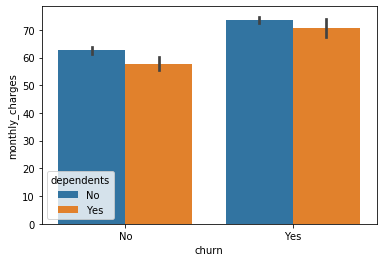

In [111]:
sns.barplot(x = 'churn', y='monthly_charges',hue = 'dependents', data=CustMonthly)

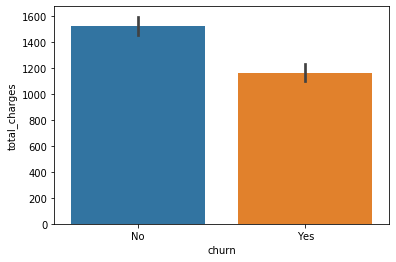

In [107]:
sns.barplot(x = 'churn', y='total_charges',data=CustMonthly)